In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/sample_data/diabetes.csv')

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [40]:
# RoadMap
# 1. Select best optimizer
# 2. No. of nodes in a layer
# 3. No. of layers
# 4. All in one model

In [41]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 17ms/step - loss: 0.6495 - accuracy: 0.6694 - val_loss: 0.6247 - val_accuracy: 0.7208
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.6857 - val_loss: 0.5892 - val_accuracy: 0.7208
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5718 - accuracy: 0.6987 - val_loss: 0.5625 - val_accuracy: 0.7468
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7215 - val_loss: 0.5415 - val_accuracy: 0.7662
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5281 - accuracy: 0.7296 - val_loss: 0.5241 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5128 - accuracy: 0.7459 - val_loss: 0.5117 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5016 - accuracy: 0.7557 - val_loss: 0.5008 - val_accuracy: 0.7857
Epoch 8/100


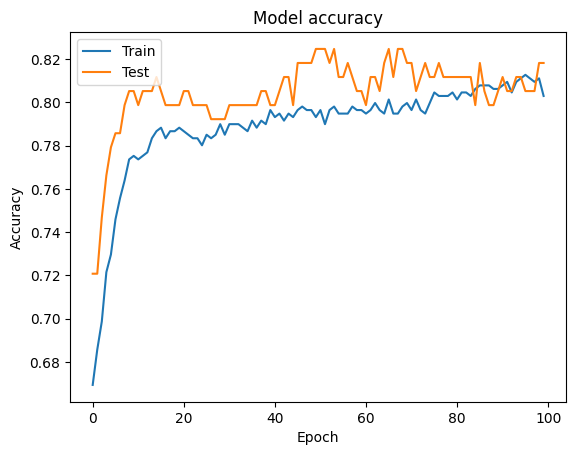

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

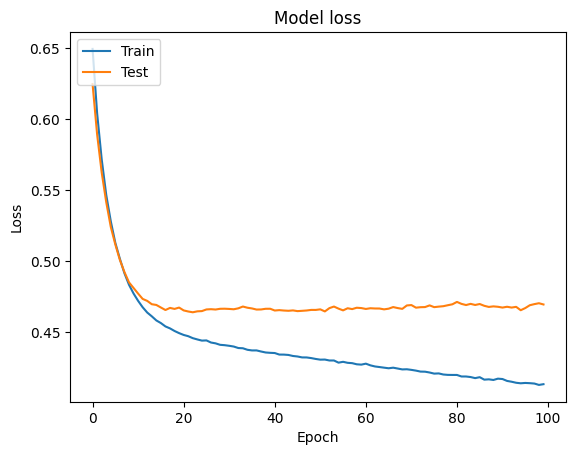

In [48]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [49]:
# !pip install -U keras-tuner

In [50]:
import keras_tuner as kt

In [51]:
def build_model(hp):

  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=8))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = hp.Choice('optimizer', values=['Adam', 'SGD','Adadelta','RMSprop'])
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [52]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [53]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
optimizer: Adam
Score: 0.7857142686843872

Trial 2 summary
Hyperparameters:
optimizer: RMSprop
Score: 0.7662337422370911

Trial 0 summary
Hyperparameters:
optimizer: Adadelta
Score: 0.6298701167106628

Trial 1 summary
Hyperparameters:
optimizer: SGD
Score: 0.6233766078948975


In [54]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'Adam'}

In [55]:
model = tuner.get_best_models(num_models=1)[0]

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.fit(X_train, y_train,batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.5270 - accuracy: 0.7345 - val_loss: 0.4970 - val_accuracy: 0.7662
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7459 - val_loss: 0.4845 - val_accuracy: 0.7727
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7557 - val_loss: 0.4748 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7655 - val_loss: 0.4703 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.7687 - val_loss: 0.4674 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7671 - val_loss: 0.4640 - val_accuracy: 0.7922
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7687 - val_loss: 0.4629 - val_accuracy: 0.7922
Epoch 8/100


In [58]:
# # prompt: make a function which calculates best number of neurons

# def tune_neurons(hp):
#   model = Sequential()
#   model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
#                   activation='relu', input_dim=8))
#   model.add(Dense(1, activation='sigmoid'))
#   model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#   return model

# tuner = kt.RandomSearch(tune_neurons,
#                         objective='val_accuracy',
#                         max_trials=5)
# tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
# best_neurons = tuner.get_best_hyperparameters()[0].get('units')
# print("Best number of neurons:", best_neurons)


In [59]:
def build_model(hp):

  model = Sequential()
  units = hp.Int('units', min_value=8, max_value=128, step=8)
  model.add(Dense(32, activation='relu', input_dim=8))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [60]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='keras-deep-learning',
                        project_name='intro_to_kt')

Reloading Tuner from keras-deep-learning/intro_to_kt/tuner0.json


In [61]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [62]:
tuner.results_summary()

Results summary
Results in keras-deep-learning/intro_to_kt
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 56
Score: 0.8051947951316833

Trial 4 summary
Hyperparameters:
units: 104
Score: 0.7922077775001526

Trial 0 summary
Hyperparameters:
units: 120
Score: 0.7532467246055603

Trial 3 summary
Hyperparameters:
units: 40
Score: 0.7467532753944397

Trial 1 summary
Hyperparameters:
units: 128
Score: 0.7467532753944397


In [63]:
tuner.get_best_hyperparameters()[0].values

{'units': 56}

In [66]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(56, activation='relu', input_dim=8))
  for i in range(hp.Int('num_layers', 1, 5)):
    model.add(Dense(56, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [67]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='keras-deep-learning',
                        project_name='num_layers')


In [68]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

tuner.results_summary()

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 15s
Results summary
Results in keras-deep-learning/num_layers
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 5
Score: 0.8181818127632141

Trial 3 summary
Hyperparameters:
num_layers: 2
Score: 0.8116883039474487

Trial 0 summary
Hyperparameters:
num_layers: 3
Score: 0.8051947951316833

Trial 1 summary
Hyperparameters:
num_layers: 1
Score: 0.7922077775001526

Trial 2 summary
Hyperparameters:
num_layers: 4
Score: 0.7857142686843872


In [69]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5}

In [70]:
model = tuner.get_best_models(num_models=1)[0]

In [73]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.9468 - val_accuracy: 0.7078
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.9708 - val_accuracy: 0.7078
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9873 - val_accuracy: 0.7078
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 9.9386e-04 - accuracy: 1.0000 - val_loss: 2.0039 - val_accuracy: 0.7078
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 9.4225e-04 - accuracy: 1.0000 - val_loss: 2.0188 - val_accuracy: 0.7078
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 9.0397e-04 - accuracy: 1.0000 - val_loss: 2.0359 - val_accuracy: 0.7078
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 8.3434e-04 - accuracy: 1.0000 - val_loss: 2.0539 - val_accuracy: 0.70

In [81]:
def build_model(hp):
  model = Sequential()

  hp_units = hp.Int('units', min_value=8, max_value=128 )
  # removed the trailing comma
  activation=hp.Choice('activation', values=['relu', 'tanh','sigmoid'])
  input_dim=8
  model.add(Dense(units=hp_units, activation=activation, input_dim=input_dim))

  for i in range(hp.Int('num_layers', 1, 5)):
    model.add(Dense(units=hp_units, activation=activation))

  # Added the missing output layer
  model.add(Dense(1, activation='sigmoid'))

  hp_optimizer = hp.Choice('optimizer', values=['Adam', 'SGD', 'RMSprop', 'Adadelta'])

  # Added the compile and return statements
  model.compile(optimizer=hp_optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [82]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='keras-deep-learning',
                        project_name='all_at_once'
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

tuner.results_summary()


Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.8116883039474487

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 12s
Results summary
Results in keras-deep-learning/all_at_once
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units: 61
activation: tanh
num_layers: 1
optimizer: Adam
Score: 0.8116883039474487

Trial 1 summary
Hyperparameters:
units: 61
activation: tanh
num_layers: 4
optimizer: RMSprop
Score: 0.798701286315918

Trial 2 summary
Hyperparameters:
units: 21
activation: tanh
num_layers: 5
optimizer: SGD
Score: 0.7662337422370911

Trial 3 summary
Hyperparameters:
units: 43
activation: relu
num_layers: 3
optimizer: SGD
Score: 0.649350643157959

Trial 0 summary
Hyperparameters:
units: 114
activation: relu
num_layers: 1
optimizer: Adadelta
Score: 0.6428571343421936


In [84]:
model = tuner.get_best_models(num_models=1)[0]

In [85]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.4725 - accuracy: 0.7720 - val_loss: 0.4653 - val_accuracy: 0.7987
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4657 - accuracy: 0.7785 - val_loss: 0.4550 - val_accuracy: 0.8052
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4712 - accuracy: 0.7655 - val_loss: 0.4582 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 17ms/step - loss: 0.4623 - accuracy: 0.7752 - val_loss: 0.4597 - val_accuracy: 0.7792
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.7752 - val_loss: 0.4564 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4705 - accuracy: 0.7736 - val_loss: 0.4575 - val_accuracy: 0.7792
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4630 - accuracy: 0.7687 - val_loss: 0.4634 - val_accuracy: 0.7792
Epoch 8